<a href="https://colab.research.google.com/github/hyperdbio/Android-inject/blob/master/ex01_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표 : 머신러닝 흐름 이해하기

1. 문제 정의
- AND 연산 학습하기
- K-Nearest Neighbors(KNN) 알고리즘 적용하기

In [ ]:
# 필요한 라이브러리 로드
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### 2. AND 연산 데이터 준비(수집)

| 문제 X1 | 문제 X2 | 답 (AND) |
|---------|---------|------------|
|   0 |   0 |   0 |
|   0 |   1 |   0 |
|   1 |   0 |   0 |
|   1 |   1 |   1 |

In [ ]:
# AND 연산 데이터 정리하기
and_data = pd.DataFrame({'X1':[0,0,1,1,1,1,1,1,0,1],
                         'X2':[0,1,0,1,1,1,0,1,1,1],
                         'AND':[0,0,0,1,1,1,0,1,0,1]})

### 3. 데이터 전처리
- 문제, 정답데이터로 분리
- train, test데이터로 분리

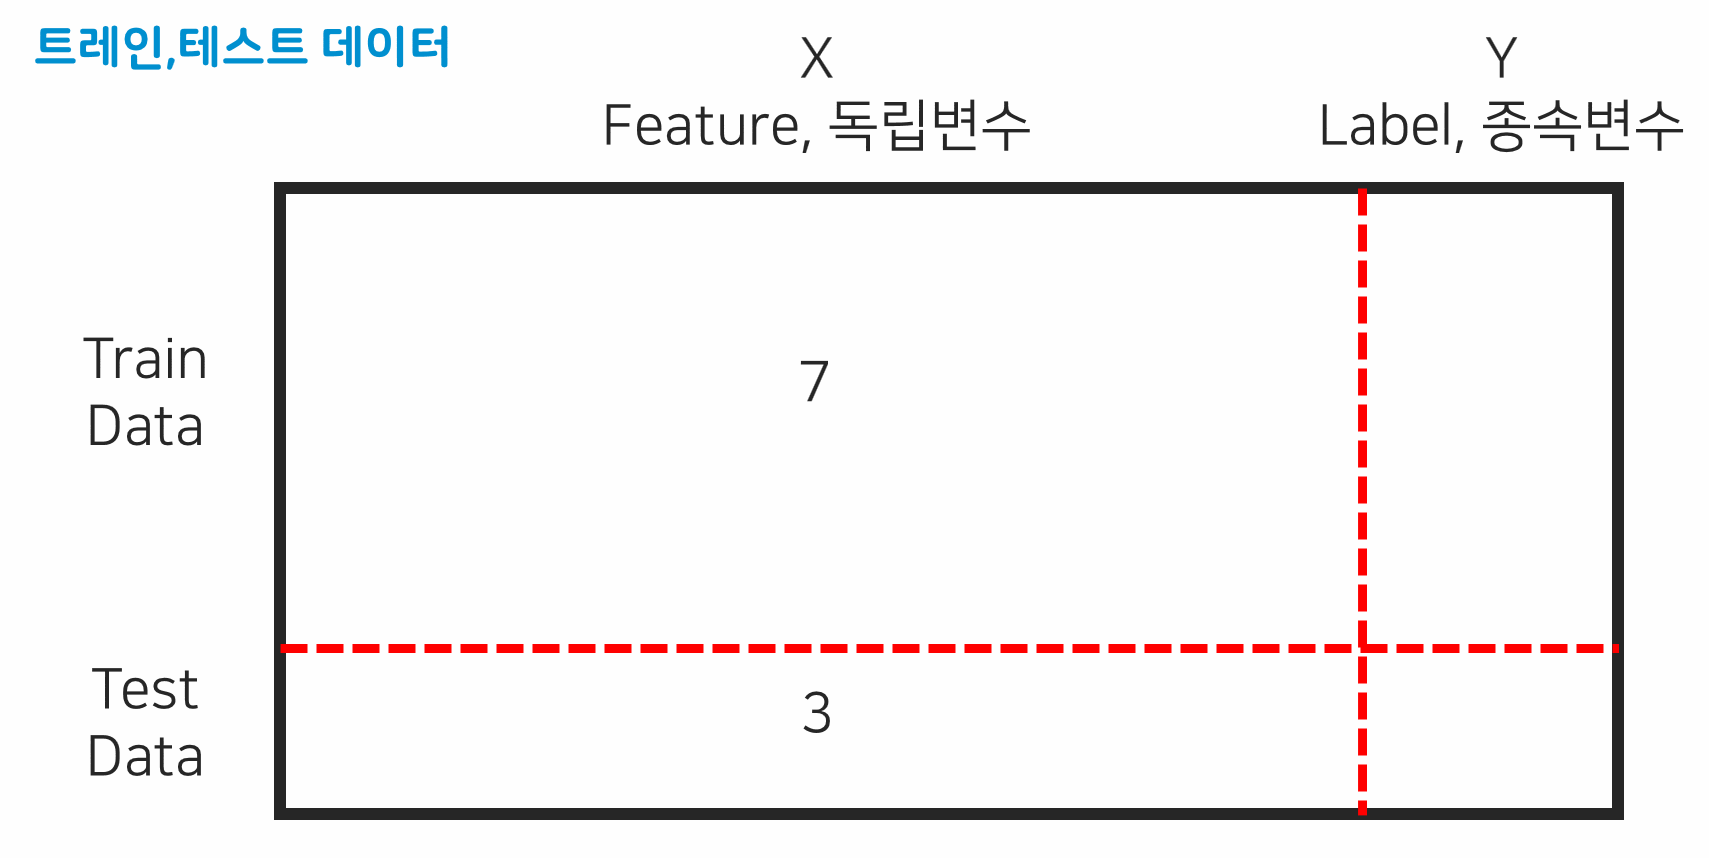

In [ ]:
and_data

,X1,X2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,1,1
5,1,1,1
6,1,0,0
7,1,1,1
8,0,1,0
9,1,1,1


In [ ]:
# 문제 데이터
X = and_data.iloc[ : , : -1 ] # 행의 범위, 열의 범위


# 정답 데이터
y = and_data.iloc[ : , -1  ] # 행의 범위, 열의 범위

In [ ]:
X.shape
y.shape

(10,)

In [ ]:
from os import X_OK
# 7:3 비율로 분리
# train : 0~6번 행(7개)
# test : 7~9번 행(3개)

X_train = X.iloc[ : 7 , : ]
X_test = X.iloc[ 7: , : ]

y_train = y.iloc[ : 7 ]
y_test = y.iloc[ 7: ]


In [ ]:
y_test

,AND
7,1
8,0
9,1


### 4. 데이터 탐색


In [ ]:
# 훈련 데이터 위주로 탐색
y_train.value_counts()

,count
AND,
0,4
1,3


# KNN 모델 생성

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# 모델 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# 문제데이터
X_test
# 1,0,1

,X1,X2
7,1,1
8,0,1
9,1,1


In [ ]:
# 테스트
knn_pred = knn.predict( X_test )

knn_pred

array([1, 0, 1])

In [ ]:
# 확인용
knn_pred_df = X_test.copy()

knn_pred_df['pred'] = knn_pred
knn_pred_df['knn_pred'] = knn_pred

knn_pred_df

,X1,X2,pred,knn_pred
7,1,1,1,1
8,0,1,0,0
9,1,1,1,1


In [ ]:
# test 예측 성능 평가
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn_pred) # 실제값, 예측값
# 0-1 확률 값으로 출력 => 1은 100%

1.0

In [ ]:
# 혼동행렬
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, knn_pred)
pd.DataFrame(cf, index=['0','1'], columns=['예측0','예측1'])


,0,1
0,1,0
1,0,2


In [ ]:
# 재현율(recall), 정밀도(precision) 확인
from sklearn.metrics import classification_report

cr = classification_report(y_test, knn_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

